<a href="https://colab.research.google.com/github/VitorSancho/Estudos_LivroEstatisticaBasica/blob/main/LivroEstat%C3%ADsticaB%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parte 1 - Análise exploratória de dados

## Capítulo 2 - Tipos de Variáveis

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados=pd.read_excel("/content/drive/My Drive/Dados_livro_estatistica_basica.xlsx",'Tabela 2.1',header=1)
dados.rename(columns={"Grau de Instrução":'grau_de_instrução',"Anos (x Sal Min)":"Salario","Região de Procedência":"Regiao"},inplace=True)
dados.head()



,N,Estado Civil,grau_de_instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Regiao
0,1,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


Visualizando frequências

In [4]:
frequencia1=dados['Estado Civil'].value_counts()
percentual1=dados['Estado Civil'].value_counts(normalize=True)*100
EstadoCivil=pd.DataFrame({'Frequencia':frequencia1,'Percentual':round(percentual1,2)})
EstadoCivil

,Frequencia,Percentual
casado,20,55.56
solteiro,16,44.44


In [5]:
frequencia2=dados['Regiao'].value_counts()
percentual2=dados['Regiao'].value_counts(normalize=True)
RegiaodeProcedencia=pd.DataFrame({'Frequencia':frequencia2,'Percentual':round(percentual2,2)})
RegiaodeProcedencia

,Frequencia,Percentual
outra,13,0.36
interior,12,0.33
capital,11,0.31


In [6]:
serie=dados['Estado Civil']=='casado'
dados3=dados[serie]

frequencia3=dados3['N de Filhos'].value_counts()
percentual3=dados3['N de Filhos'].value_counts(normalize=True)
NdeFilhos=pd.DataFrame({'Frequencia':frequencia3,'Percentual':round(percentual3,2)})
NdeFilhos.rename_axis("NdeFilhos",axis="columns",inplace=True)

NdeFilhos


NdeFilhos,Frequencia,Percentual
2.0,7,0.35
1.0,5,0.25
0.0,4,0.20
3.0,3,0.15
5.0,1,0.05


In [7]:
# frequencia4=dados['Anos'].value_counts()
# percentual4=dados['Anos'].value_counts(normalize=True)
# Idade=pd.DataFrame({'Frequencia':frequencia4,'Percentual':round(percentual4,2)})
# Idade

# pd.cut(x=dados.Renda,
#                        bins=k,
#                        include_lowest=True)


frequencia4=pd.value_counts(pd.cut(x=dados.Anos,bins=3,include_lowest=True)).sort_index()
percentual4=round(pd.value_counts(pd.cut(x=dados.Anos,bins=3,include_lowest=True),normalize=True).sort_index(),2)

Idades=pd.DataFrame({"Frequencia":frequencia4,"Percentual":percentual4})
Idades

,Frequencia,Percentual
"(19.971, 29.333]",8,0.22
"(29.333, 38.667]",17,0.47
"(38.667, 48.0]",11,0.31


In [8]:
dados2=pd.read_excel("/content/drive/My Drive/Dados_livro_estatistica_basica.xlsx",'CD-Brasil',header=4)
#Alterando o nome das variáveis
dados2.rename(columns={'Unnamed: 0': 'Região', 'Unnamed: 1': 'Estado'}, inplace=True)
#Refatorar: Utilizar Unstack

serie2=(dados2['Estado']!='Subtot') & (dados2['Estado']!='Total')

dados2=dados2[serie2]
dados2

,Região,Estado,Superfície,População,Densidade
0,Norte,RO,237576.167,1453756,6.119115
1,NaN,AC,164165.250,653385,3.980044
2,NaN,AM,1559161.810,3221940,2.066456
3,NaN,RR,224298.980,395725,1.764275
4,NaN,PA,1247689.515,7065573,5.662926
5,NaN,AP,142814.585,587311,4.112402
6,NaN,TO,277620.914,1243627,4.479587
8,Nordeste,MA,331983.293,6118995,18.431635
9,NaN,PI,251529.186,3032435,12.055997
10,NaN,CE,148825.602,8185250,54.998938


In [9]:
faixa=[dados2.População.min(),1000000,5000000,10000000,20000000,dados2.População.max()]

populacao=pd.value_counts(pd.cut(dados2.População,bins=faixa,include_lowest=True)).sort_index()
populacaoPercentual=pd.value_counts(pd.cut(dados2.População,bins=faixa,include_lowest=True),normalize=True).sort_index()

dist_populacao=pd.DataFrame({"Frequencia":populacao,"Percentual":populacaoPercentual})
dist_populacao

,Frequencia,Percentual
"(395724.999, 1000000.0]",3,0.111111
"(1000000.0, 5000000.0]",12,0.444444
"(5000000.0, 10000000.0]",6,0.222222
"(10000000.0, 20000000.0]",5,0.185185
"(20000000.0, 39827690.0]",1,0.037037


In [10]:
faixa2=[dados2.Densidade.min(),10,30,50,100,dados2.Densidade.max()]

densidade=pd.value_counts(pd.cut(dados2.Densidade,bins=faixa2,include_lowest=True))
densidade=pd.value_counts(pd.cut(dados2.Densidade,bins=faixa2,include_lowest=True))
densidadePercentual=pd.value_counts(pd.cut(dados2.Densidade,bins=faixa2,include_lowest=True),normalize=True)

dist_densidade_populacao=pd.DataFrame({"Frequencia":densidade,"Percentual":densidadePercentual})
# dist_densidade_populacao.value_counts()
dist_densidade_populacao

,Frequencia,Percentual
"(1.7630000000000001, 10.0]",9,0.333333
"(50.0, 100.0]",8,0.296296
"(100.0, 423.29]",4,0.148148
"(10.0, 30.0]",4,0.148148
"(30.0, 50.0]",2,0.074074


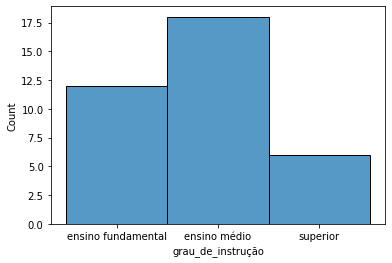

In [11]:
grafico=sns.histplot(data=dados,x=dados['grau_de_instrução'])

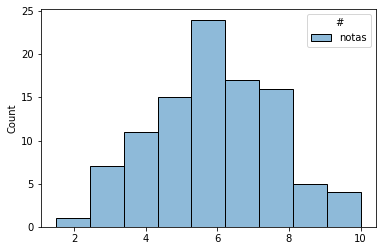

In [12]:
notas=pd.read_excel("/content/drive/My Drive/Dados_livro_estatistica_basica.xlsx",'CD-Notas1',header=2)

notas.rename_axis('#',axis= 'columns',inplace=True)
notas.rename(columns={'Fonte: Autores': 'notas'},inplace=True)
# NdeFilhos.rename_axis("NdeFilhos",axis="columns",inplace=True)

grafico_notas=sns.histplot(data=notas,bins=9)

Calculando posições de decis e quartis


In [13]:
dados2.head()
# primeiro_decil=dados2.População.quantile(0.1)
# primeiro_quartil=dados2.População.quantile(0.25)
# segundo_quartil=dados2.População.quantile(0.5)
# terceiro_quartil=dados2.População.quantile(0.75)
# oitavo_decil=dados2.População.quantile(0.8)


,Região,Estado,Superfície,População,Densidade
0,Norte,RO,237576.167,1453756,6.119115
1,NaN,AC,164165.250,653385,3.980044
2,NaN,AM,1559161.810,3221940,2.066456
3,NaN,RR,224298.980,395725,1.764275
4,NaN,PA,1247689.515,7065573,5.662926


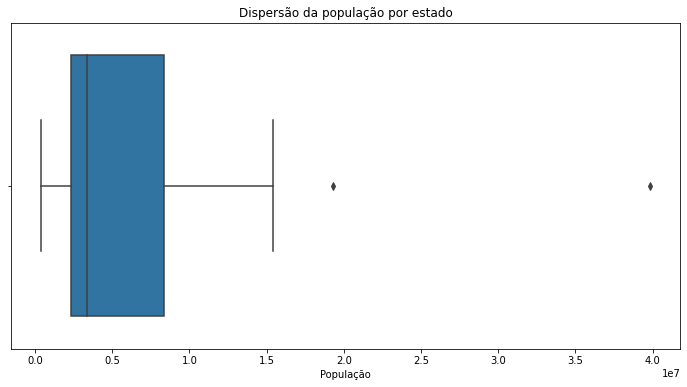

In [14]:
boxplot1=sns.boxplot(data=dados2,x=dados2.População,orient='h')
boxplot1.set_title("Dispersão da população por estado")
boxplot1.figure.set_size_inches(12,6)

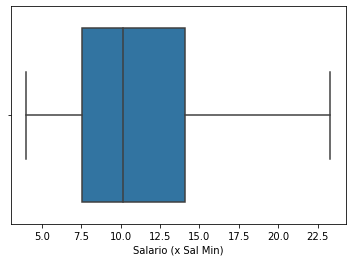

In [16]:
boxplot2=sns.boxplot(data=dados,x=dados['Salario (x Sal Min)'],orient='h')
#dados.head()

Calculando grau de assimetria 

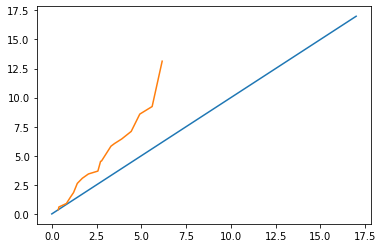

In [20]:
mediana_salarios=dados['Salario (x Sal Min)'].median()

u=[]
v=[]

salarios_ordenados=dados['Salario (x Sal Min)'].sort_values()

for salario in salarios_ordenados:
  diferença_mediana=abs(salario-mediana_salarios)

  if salario<mediana_salarios:    
    u.append(diferença_mediana)
  else:
    v.append(diferença_mediana)    

v=sorted(v,reverse=True)

lista_numeros1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# lista_numeros2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

Df=pd.DataFrame({"u":u,"v":v,'ref1':lista_numeros1})

plt.plot(lista_numeros1,lista_numeros1)
plt.plot(Df.u,Df.v)

RESULTADO: Observamos que a distancia entre a mediana e os pontos situados antes dela é menor que a distancia entre mediana e os pontos posteriores.
Ou seja, observamos uma assimetria a esquerda.

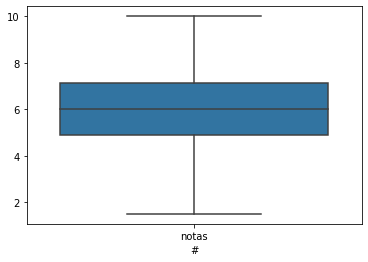

In [21]:
boxplot3=sns.boxplot(data=notas)

## Capítulo 3 -Medidas de associação entre variáveis qualitativas

De acordo com os dados vistos abaixo, que relacionam grau de escolaridade e região, é possível notar que não existe dependência entre os dados relacionados (variável não associadas). Isso se deve ao fato de que, normalmente, a população já apresenta o ensino médio com maior frequência para todas as regiões listadas.

A frequencia de grau de instrução para cada região apresenta a mesma frequência, tendo todas as regiões um menor número de pessoas com ensino superior e um maior número com ensino médio. Por isso, podemos afirmar que o grau de instrução não depende exclusivamente da região da pessoa.

Ou fator a ser observado é a probabilidade marginal de cada grau de instrução, que é reprodutivel - em termos numéricos - dentro de cada região

In [22]:
tabela1=round(pd.crosstab(dados.Regiao,dados.grau_de_instrução,margins=True,normalize='index',margins_name="Total")*100)
tabela1
# aqui é possivel ver que a frequência do grau de instrução se repete nos dados marginais

grau_de_instrução,ensino fundamental,ensino médio,superior
Regiao,,,
capital,36.0,45.0,18.0
interior,25.0,58.0,17.0
outra,38.0,46.0,15.0
Total,33.0,50.0,17.0


In [23]:
tabela2=round(pd.crosstab(dados.Regiao,dados.grau_de_instrução,margins=True,normalize='columns',margins_name="Total")*100)
tabela2

grau_de_instrução,ensino fundamental,ensino médio,superior,Total
Regiao,,,,
capital,33.0,28.0,33.0,31.0
interior,25.0,39.0,33.0,33.0
outra,42.0,33.0,33.0,36.0


In [24]:
exercicio9 = {'Menos de 4 meses': [64,104,27], 'De 4 a 8 meses': [120,175,48],'Mais de 8 meses':[16,21,5]}

exercicio_9=pd.DataFrame(data=exercicio9,index=['A','B','C'])
# exercicio9.rename(index={"0":'teste'},inplace=True)

menos_4_meses=sum(exercicio9['Menos de 4 meses'])
de_4_a_8_meses=sum(exercicio9['De 4 a 8 meses'])
mais_de_8_meses=sum(exercicio9['Mais de 8 meses'])
total=menos_4_meses+de_4_a_8_meses+mais_de_8_meses

menos_de_4=[]
de_4_a_8=[]
mais_de_8=[]

for numero in [64,104,27]:
  i=numero/menos_4_meses
  menos_de_4.append(i*100)
menos_de_4.append(menos_4_meses*100/total)

for numero in [120,175,48]:
  i=numero/de_4_a_8_meses
  de_4_a_8.append(i*100)
de_4_a_8.append(de_4_a_8_meses*100/total)  

for numero in [16,21,5]:
  i=numero/mais_de_8_meses
  mais_de_8.append(i*100)
mais_de_8.append(mais_de_8_meses*100/total)  

Total=[(64+120+16),(104+175+21),(27+48+5)]
totalizado=sum(Total)
Total=[round(i*100/totalizado,2) for i in Total]
Total.append(totalizado)


exercicio9 = {'Menos de 4 meses': menos_de_4, 'De 4 a 8 meses': de_4_a_8,'Mais de 8 meses':mais_de_8,'Total':Total}
exercicio_9=pd.DataFrame(data=exercicio9,index=['A','B','C','Total'])

exercicio_9

,Menos de 4 meses,De 4 a 8 meses,Mais de 8 meses,Total
A,32.820513,34.985423,38.095238,34.48
B,53.333333,51.020408,50.000000,51.72
C,13.846154,13.994169,11.904762,13.79
Total,33.620690,59.137931,7.241379,580.00


Para o exemplo acima, as compainhas A, B e C não possuem diferença significativa em termos de tempo de eficácia do tratamento. Nos três recortes de tempo, todas mantiveram sua fatia de participação muito próxima da média. 

## Cálculo de qui-quadrado de Pearson

In [25]:
tabela3=round(pd.crosstab(dados.Regiao,dados.grau_de_instrução,normalize='index')*100)
tabela3

grau_de_instrução,ensino fundamental,ensino médio,superior
Regiao,,,
capital,36.0,45.0,18.0
interior,25.0,58.0,17.0
outra,38.0,46.0,15.0


In [26]:
total_fundamental=(round(dados.grau_de_instrução.value_counts(normalize=True),2)*100)[1]
total_medio=(round(dados.grau_de_instrução.value_counts(normalize=True),2)*100)[0]
total_superior=(round(dados.grau_de_instrução.value_counts(normalize=True),2)*100)[2]

n=tabela3.shape[0]*tabela3.shape[1]
lista_qui_quadrado=[]

for numero in tabela3['ensino fundamental']:
  desvio_relativo=((numero-total_fundamental)**2)/n
  lista_qui_quadrado.append(desvio_relativo)

for numero in tabela3['ensino médio']:
  desvio_relativo=((numero-total_medio)**2)/n
  lista_qui_quadrado.append(desvio_relativo)

for numero in tabela3['superior']:
  desvio_relativo=((numero-total_superior)**2)/n
  lista_qui_quadrado.append(desvio_relativo)  

qui_quadrado=round(sum(lista_qui_quadrado),2)
qui_quadrado

23.11

Valor de qui-quadrado obtido acima é pequeno em relação aos exemplos indicados no livros. Assim, pode-se inferir que esses dados possuem uma menor associação entre as variaveis. Ou seja, para esse conjunto de dados, o grau de instrução depende pouco da região do funcionário.

Quando maior o valor de qui-quadrado, mais o grau de associação entre as variáveis

In [27]:
execicios_19={'Urbano':[30,60],'Suburbano':[35,25],'Rural':[35,15]}
indice_19=['A favor','Contra']

exercicios_19_tabela=pd.DataFrame(data=execicios_19,index=indice_19)

exercicios_19_tabela
exercicios_19_tabela.loc[:,'Total'] = exercicios_19_tabela.sum(numeric_only=True, axis=1)

exercicios_19_tabela['Urbano_percentual']=exercicios_19_tabela['Urbano'].apply(lambda x: 100 * x / (exercicios_19_tabela['Urbano'].sum()))
exercicios_19_tabela['Suburbano_percentual']=exercicios_19_tabela['Suburbano'].apply(lambda x: 100 * x / (exercicios_19_tabela['Suburbano'].sum()))
exercicios_19_tabela['Rural_percentual']=exercicios_19_tabela['Rural'].apply(lambda x: 100 * x / (exercicios_19_tabela['Rural'].sum()))

percentual_a_favor=50
percentual_contra=percentual_a_favor
 
lista_erro_qui_quadrado=[]

for numero in exercicios_19_tabela['Suburbano_percentual']:
  erro_normalizado=((numero-percentual_a_favor)**2)/percentual_a_favor
  lista_erro_qui_quadrado.append(erro_normalizado)

for numero in exercicios_19_tabela['Urbano_percentual']:
  erro_normalizado=((numero-percentual_a_favor)**2)/percentual_a_favor
  lista_erro_qui_quadrado.append(erro_normalizado)

for numero in exercicios_19_tabela['Rural_percentual']:
  erro_normalizado=((numero-percentual_a_favor)**2)/percentual_a_favor
  lista_erro_qui_quadrado.append(erro_normalizado)    

qui_quadrado_exercicio19=sum(lista_erro_qui_quadrado)

qui_quadrado_exercicio19

29.888888888888893

In [ ]:
  # total_urbano=exercicios_19_tabela.Urbano.sum()
# total_suburbano=exercicios_19_tabela.Suburbano.sum()
# total_rural=exercicios_19_tabela.Rural.sum()

# n=exercicios_19_tabela.shape[0]*exercicios_19_tabela.shape[1]
# lista_qui_quadrado_exercicios_19_tabela=[]

# for numero in exercicios_19_tabela['Urbano']:
#   desvio_relativo=((numero-total_urbano)**2)/n
#   lista_qui_quadrado_exercicios_19_tabela.append(desvio_relativo)

# for numero in exercicios_19_tabela['Suburbano']:
#   desvio_relativo=((numero-total_suburbano)**2)/n
#   lista_qui_quadrado_exercicios_19_tabela.append(desvio_relativo)

# for numero in exercicios_19_tabela['Rural']:
#   desvio_relativo=((numero-total_rural)**2)/n
#   lista_qui_quadrado_exercicios_19_tabela.append(desvio_relativo)  

# qui_quadrado_exercicio19=round(sum(lista_qui_quadrado_exercicios_19_tabela),2)
# qui_quadrado_exercicio19

## Grau de associação entre Variáveis Quantitativas e Qualitativas

Para tratar do grau de associoação entre dados temos duas possíveis abordagens:
- Calculo de qui-quadrado - utilizado para dados agrupados, baseando-se na homogeneidade dos grupos formados de acordo com sua variância.

- Calculo do coeficiente de correlação - utilizado para dados não agrupados. Nesse cálculo, o conjunto de dados tem seu centro cartesiano tranladado para as médias das coordenadas. Depois calcula-se o desvio em relação da média, que é normalizado utilizando-se o desvio padrão de pada coordenada. O coeficiente de corelação é a média entre o produtos dos desvios normalizados.

In [29]:
# tabela4=dados['grau_de_instrução'].value_counts()
tabela_contagem=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').count()
tabela_media=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').mean()
tabela_std=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').std()
tabela_var=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').var()
tabela_min=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').min()
tabela_max=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').max()
tabela_quantile1=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').quantile(0.25)
tabela_quantile2=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').quantile(0.5)
tabela_quantile3=dados[['Salario (x Sal Min)','grau_de_instrução']].groupby(by='grau_de_instrução').quantile(0.75)

lista_de_tabelas=[tabela_std,tabela_var,tabela_min,tabela_max,tabela_quantile1,tabela_quantile2,tabela_quantile3]
tabela_total=tabela_contagem.merge(tabela_media, how='inner', on='grau_de_instrução')

for tabela in lista_de_tabelas:
  tabela_total=tabela_total.merge(tabela,how='inner', on='grau_de_instrução')

tabela_total.columns=['n','media','std','var','min','max','q1','q2','q3']

round(tabela_total,2)

,n,media,std,var,min,max,q1,q2,q3
grau_de_instrução,,,,,,,,,
ensino fundamental,12,7.84,2.96,8.74,4.00,13.85,6.01,7.12,9.16
ensino médio,18,11.53,3.72,13.80,5.73,19.40,8.84,10.91,14.42
superior,6,16.47,4.50,20.27,10.53,23.30,13.65,16.74,18.38


In [32]:
variancia_total=dados['Salario (x Sal Min)'].var() #vars
total_de_dados=dados.shape[0]
tabela_produto=tabela_contagem*tabela_var
varS=tabela_produto.sum()/total_de_dados

R2=1-(varS/variancia_total)
R2[0]

0.37308087722236694

Observando o resultado obtido para R2 vemos que existe um baixo grau de associação entre o grau de instrução e o salário recebido.
Isso foi constatato ao analizar o grau de dispersão dos dados, através da variancia, dentro de um mesmo grupo. Assim notamos que a variável salário tem baixa correlação com a variavel grau de instrução.
Com o valor de R2 obtido afirmamos que 37% da variancia dos salarios é explicada em função do grau de instrução. 

Calculo agrupando dados 

In [33]:
tabela_contagem=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').count()
tabela_media=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').mean()
tabela_std=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').std()
tabela_var=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').var()
tabela_min=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').min()
tabela_max=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').max()
tabela_quantile1=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').quantile(0.25)
tabela_quantile2=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').quantile(0.5)
tabela_quantile3=dados[['Salario (x Sal Min)','Regiao']].groupby(by='Regiao').quantile(0.75)

lista_de_tabelas=[tabela_std,tabela_var,tabela_min,tabela_max,tabela_quantile1,tabela_quantile2,tabela_quantile3]
tabela_total2=tabela_contagem.merge(tabela_media, how='inner', on='Regiao')

for tabela in lista_de_tabelas:
  tabela_total2=tabela_total2.merge(tabela,how='inner', on='Regiao')

tabela_total2.columns=['n','media','std','var','min','max','q1','q2','q3']
tabela_total2

,n,media,std,var,min,max,q1,q2,q3
Regiao,,,,,,,,,
capital,11,11.455455,5.476653,29.993727,4.56,19.40,7.490,9.770,16.625
interior,12,11.550000,5.296055,28.048200,4.00,23.30,7.805,10.645,14.695
outra,13,10.445385,3.145453,9.893877,5.73,16.22,8.740,9.800,12.790


In [35]:
variancia_total=dados['Salario (x Sal Min)'].var() #vars
total_de_dados=dados.shape[0]
tabela_produto2=tabela_contagem*tabela_var
varS2=tabela_produto2.sum()/total_de_dados

R2=1-(varS2/variancia_total)
R2[0]

-0.04952169686226271

Acima observamos uma correlação ainda menor entre salário e a região do funcionário. Apenas 4,9% da variabilidade dos salários são explicados pela região do funcionário. Note que na tabela resumo os valores internos são muito próximos entre si, o que indica que os dados possuem alguma caractarística externa à região do funcionário, ou seja, a população possui uma ordenação de independe da região.

In [36]:
tabela_contagem=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').count()
tabela_media=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').mean()
tabela_std=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').std()
tabela_var=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').var()
tabela_min=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').min()
tabela_max=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').max()
tabela_quantile1=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').quantile(0.25)
tabela_quantile2=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').quantile(0.5)
tabela_quantile3=dados[['Anos','Estado Civil']].groupby(by='Estado Civil').quantile(0.75)

lista_de_tabelas=[tabela_std,tabela_var,tabela_min,tabela_max,tabela_quantile1,tabela_quantile2,tabela_quantile3]
tabela_total2=tabela_contagem.merge(tabela_media, how='inner', on='Estado Civil')

for tabela in lista_de_tabelas:
  tabela_total2=tabela_total2.merge(tabela,how='inner', on='Estado Civil')

tabela_total2.columns=['n','media','std','var','min','max','q1','q2','q3']
tabela_total2

,n,media,std,var,min,max,q1,q2,q3
Estado Civil,,,,,,,,,
casado,20,35.150,5.896252,34.765789,26,48,30.75,34.5,39.25
solteiro,16,33.875,7.804913,60.916667,20,46,26.75,35.5,40.25


In [38]:
variancia_total=dados.Anos.var() #vars
total_de_dados=dados.shape[0]
tabela_produto2=tabela_contagem*tabela_var
varS2=tabela_produto2.sum()/total_de_dados

R2=1-(varS2/variancia_total)
R2[0]

-0.021931741671689764

Vemos que a variancia da idade para cada estado civil possui valores próximos a variancia da população. ou seja, ao quebrar os dados em categooria não foi possível reduzir a variancia, o que indica que a relação entre as variáveis é muito pequena.

CORRELAÇÃO PARA DADOS NÃO AGRUPADOS:

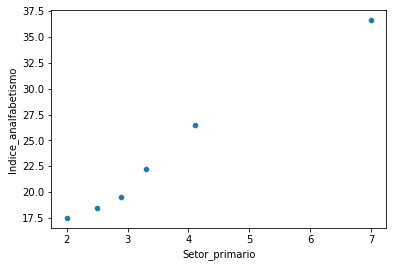

In [39]:
setor_analfabetismo = {'Setor_primario': [2.0,2.5,2.9,3.3,4.1,7.0], 'Indice_analfabetismo': [17.5,18.5,19.5,22.2,26.5,36.6]}
indice=['São Paulo','Rio de Janeiro','Belém','Belo Horizonte','Salvador','Recife']
indicadores_sociais_estados=pd.DataFrame(data=setor_analfabetismo,index=indice)
indicadores_sociais_estados

relacao_setor_anafalbetimo=sns.scatterplot(x=indicadores_sociais_estados.Setor_primario,y=indicadores_sociais_estados.Indice_analfabetismo)
relacao_setor_anafalbetimo

In [40]:
media_setor_primario=indicadores_sociais_estados.Setor_primario.mean()
desvio_padrao_setor_primario=indicadores_sociais_estados.Setor_primario.std()
media_analfabetismo=indicadores_sociais_estados.Indice_analfabetismo.mean()
desvio_padrao_analfabetismo=indicadores_sociais_estados.Indice_analfabetismo.std()

desvio_da_media_setor_primario=[]
normalizando_desvio_da_media_setor_primario=[]
desvio_da_media_analfabetismo=[]
normalizando_desvio_da_media_analfabetismo=[]

for estado in indicadores_sociais_estados.Setor_primario:
  desvio1=estado-media_setor_primario
  desvio_da_media_setor_primario.append(desvio1)

for desvio in desvio_da_media_setor_primario:
  normalizado1=desvio/desvio_padrao_setor_primario
  normalizando_desvio_da_media_setor_primario.append(normalizado1)  

for estado in indicadores_sociais_estados.Indice_analfabetismo:
  desvio2=estado-media_analfabetismo
  desvio_da_media_analfabetismo.append(desvio2)  

for desvio in desvio_da_media_analfabetismo:
  normalizado2=desvio/desvio_padrao_analfabetismo
  normalizando_desvio_da_media_analfabetismo.append(normalizado2)

##produto_entre_normalizadsos=[normalizando_desvio_da_media_analfabetismo*normalizando_desvio_da_media_analfabetismo] 
dicionario_setor_analfabetismo = {'Setor_primario': [2.0,2.5,2.9,3.3,4.1,7.0],
                              'Indice_analfabetismo': [17.5,18.5,19.5,22.2,26.5,36.6],
                              'Desvio_setor_primario':desvio_da_media_setor_primario,
                              'Desvio_analfabetismo':desvio_da_media_analfabetismo,
                              'normalizado_setor_primario':normalizando_desvio_da_media_setor_primario,
                              'normalizado_analfabetismo':normalizando_desvio_da_media_analfabetismo}
indice=['São Paulo','Rio de Janeiro','Belém','Belo Horizonte','Salvador','Recife'] 

tabela_setor_analfabetismo=pd.DataFrame(data=dicionario_setor_analfabetismo,index=indice)
tabela_setor_analfabetismo['Produto_normalizados']=tabela_setor_analfabetismo.normalizado_analfabetismo*tabela_setor_analfabetismo.normalizado_setor_primario
# tabela_setor_analfabetismo

somatorio_produto_normalizado=tabela_setor_analfabetismo.Produto_normalizados.sum()
# print(somatorio_produto_normalizado)

total_de_dados=tabela_setor_analfabetismo.shape[0]
# total_de_dados

coeficiente_de_correlacao=somatorio_produto_normalizado/total_de_dados
coeficiente_de_correlacao



0.8284199652508075

Acima vemos um considerável grau de correlação entre as pessoas que trabalham no setor primário da economia e seu grau de instrução.

## Gráfico q x q

Gráfico quantis x quantis

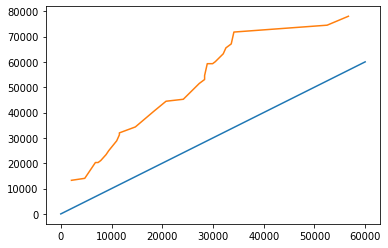

In [41]:
dados_salarios=pd.read_excel("/content/drive/My Drive/Dados_livro_estatistica_basica.xlsx",'CD-Salarios',header=4)

professores=dados_salarios['Prof. Sec.'].sort_values()

Administrador=dados_salarios['Administrador'].sort_values()

lista_numeros=[0,100,60000]
# lista_numeros2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]


plt.plot(lista_numeros,lista_numeros)
plt.plot(professores,Administrador)
plt.xlabel='teste'

Observamos acima que admnistradores que ganham bem ganham mais que os professores que também ganham bem. Além disso, admistradoes quee ganham mal ganham mais que professores que ganham mal. Os seja, os percentis de dados sobre os administradores sempre são maiores que os pencentis de professores. Concluímos isso ao notar que todos os dados eestão prersentes sobre a curva x=y